In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [43]:
movies = pd.read_csv('/Users/vasanthaggala/Documents/GitHub/movie-revenue-predictor/data/tmdb_5000_movies.csv')
credits = pd.read_csv('/Users/vasanthaggala/Documents/GitHub/movie-revenue-predictor/data/tmdb_5000_credits.csv')

In [44]:
credits = credits.rename(columns={"movie_id": "id"})
df = movies.merge(credits, on='id')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [45]:
print(df.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')


In [46]:
print(df.isnull().sum())

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64


In [47]:
print(df[['budget', 'revenue']].describe())
print(df[df['budget'] == 0].shape)
print(df[df['revenue'] == 0].shape)
print(f"number of movies in df: {df.shape[0]}")

             budget       revenue
count  4.803000e+03  4.803000e+03
mean   2.904504e+07  8.226064e+07
std    4.072239e+07  1.628571e+08
min    0.000000e+00  0.000000e+00
25%    7.900000e+05  0.000000e+00
50%    1.500000e+07  1.917000e+07
75%    4.000000e+07  9.291719e+07
max    3.800000e+08  2.787965e+09
(1037, 23)
(1427, 23)
number of movies in df: 4803


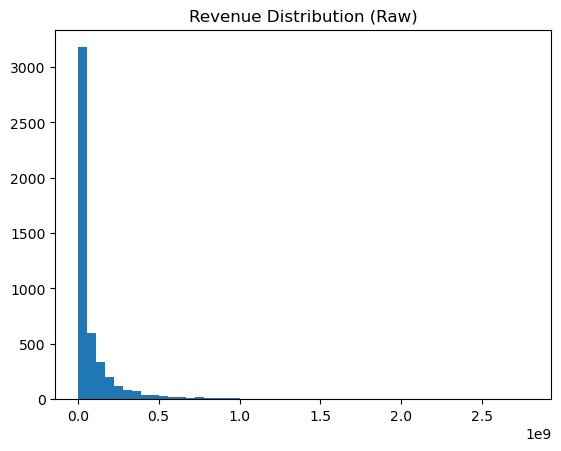

In [48]:
plt.hist(df['revenue'], bins=50)
plt.title('Revenue Distribution (Raw)')
plt.show()

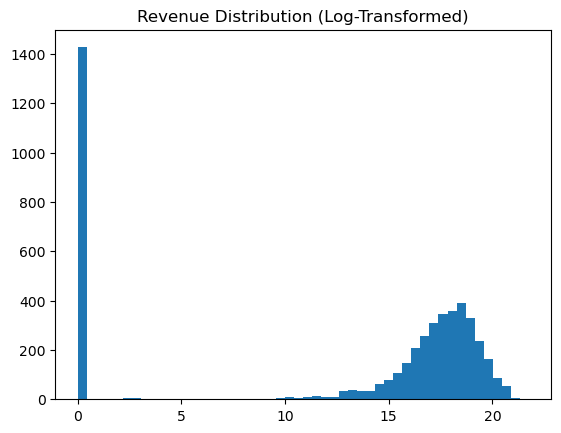

In [49]:
plt.hist(np.log1p(df['revenue']), bins=50)
plt.title('Revenue Distribution (Log-Transformed)')
plt.show()

In [50]:
sample = df.iloc[0]
print(sample['genres'])
print(type(sample['genres']))
genres = ast.literal_eval(sample['genres'])
print(genres)
print(type(genres))

genreNames = [genre['name'] for genre in genres]
print(genreNames)

[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]
<class 'str'>
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]
<class 'list'>
['Action', 'Adventure', 'Fantasy', 'Science Fiction']


In [51]:
df['genres'] = df['genres'].apply(ast.literal_eval)
df['cast'] = df['cast'].apply(ast.literal_eval)

df['cast_size'] = df['cast'].apply(lambda x: len(x))
print(df['cast_size'].describe())


count    4803.000000
mean       22.123048
std        19.582493
min         0.000000
25%        11.000000
50%        16.000000
75%        25.000000
max       224.000000
Name: cast_size, dtype: float64


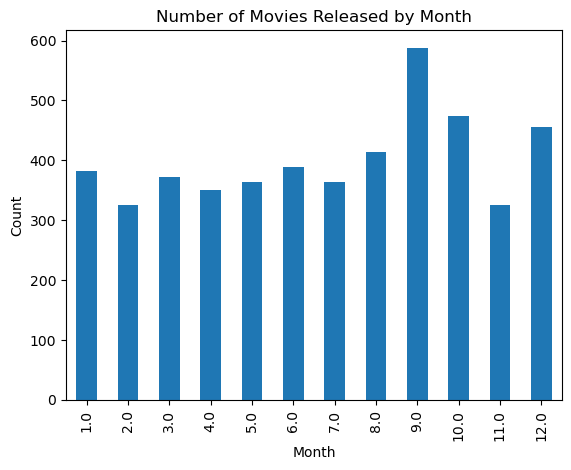

In [52]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_month'] = df['release_date'].dt.month
df['release_month'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Movies Released by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

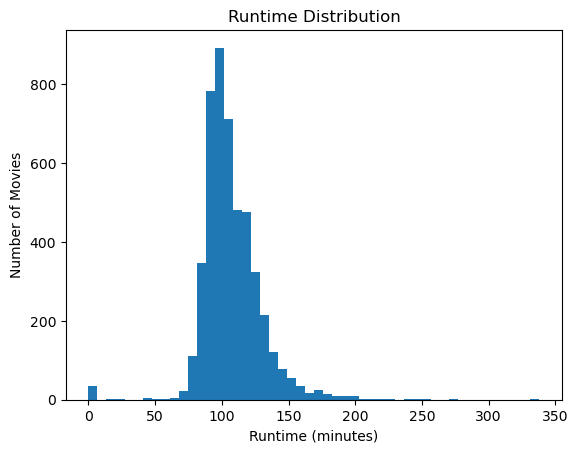

In [53]:
plt.hist(df['runtime'].dropna(), bins=50)
plt.title('Runtime Distribution')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.show()